<a href="https://colab.research.google.com/github/Nicolecoline/cole-EDA-CS103/blob/main/exer1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pip install mailbox

  Preparing metadata (setup.py) ... done
  Created wheel for mailbox: filename=mailbox-0.4-py3-none-any.whl size=4684 sha256=4750f6f8f4933506b6f1855ea95972d6c9b82c8f4f749e8a7b286e3e33fb49c7
  Stored in directory: /root/.cache/pip/wheels/7a/95/10/e0864f9d19ec7dcdf7eeedcb286ec19fc2556404a5e63e12de
Successfully built mailbox


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
import mailbox

mboxfile = "/content/gdrive/My Drive/Colab Notebooks/exer1/De Luna.mbox"

mbox = mailbox.mbox(mboxfile)
mbox

In [16]:
for key in mbox[0].keys():
  print(key)

X-GM-THRID
X-Gmail-Labels
Delivered-To
Received
X-Google-Smtp-Source
X-Received
ARC-Seal
ARC-Message-Signature
ARC-Authentication-Results
Return-Path
Received
Received-SPF
Authentication-Results
DKIM-Signature
X-Mailgun-Sending-Ip
X-Mailgun-Sid
Received
Date
Mime-Version
Content-Type
Subject
From
To
X-Mailgun-Dkim
X-Mailgun-Native-Send
X-Mailgun-Track-Clicks
X-Mailgun-Track-Opens
X-Mailer
X-Report-Abuse-To
Feedback-Id
X-Mailgun-Variables
Message-Id


In [17]:
import csv

with open('mailbox.csv', 'w') as outputfile:
  writer = csv.writer(outputfile)
  writer.writerow(['subject','from','date','to','label','thread'])

  for message in mbox:
    writer.writerow([message['subject'], message['from'],  message['date'], message['to'],  message['X-Gmail-Labels'], message['X-GM-THRID']])

In [18]:
dfs = pd.read_csv('mailbox.csv', names=['subject', 'from', 'date', 'to', 'label', 'thread'])

In [19]:
dfs.dtypes

,0
subject,object
from,object
date,object
to,object
label,object
thread,object


In [20]:
dfs['date'] = dfs['date'].apply(lambda x: pd.to_datetime(x, errors='coerce', utc=True))

In [21]:
dfs = dfs[dfs['date'].notna()]

In [22]:
dfs.to_csv('gmail.csv')

In [23]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 321 entries, 1 to 321
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype              
---  ------   --------------  -----              
 0   subject  229 non-null    object             
 1   from     321 non-null    object             
 2   date     321 non-null    datetime64[ns, UTC]
 3   to       314 non-null    object             
 4   label    321 non-null    object             
 5   thread   321 non-null    object             
dtypes: datetime64[ns, UTC](1), object(5)
memory usage: 17.6+ KB


In [24]:
dfs.head(10)

,subject,from,date,to,label,thread
1,2024 Data & AI Literacy Report Out Now!,DataCamp <team@datacamp.com>,2024-05-20 14:20:48+00:00,nicole.deluna@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1799581702433720303
2,NaN,Nicole DE LUNA <nicole.deluna@students.isatu.e...,2024-05-27 08:23:04+00:00,edorafrancesanne.arcenas@students.isatu.edu.ph,"Archived,Sent",1800193368317954980
3,NaN,Nicole DE LUNA <nicole.deluna@students.isatu.e...,2024-02-29 05:44:14+00:00,Nicole DE LUNA <nicole.deluna@students.isatu.e...,"Sent,Inbox,Important,Opened",1792210871280915896
4,NaN,Nicole DE LUNA <nicole.deluna@students.isatu.e...,2023-12-16 23:59:34+00:00,Nicole DE LUNA <nicole.deluna@students.isatu.e...,"Sent,Inbox,Important,Opened",1785484979445501163
5,$74 Off: Almost Over!,DataCamp <team@datacamp.com>,2024-04-17 19:05:26+00:00,nicole.deluna@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1796609909851486133
6,You earned 520 XP this week + new AI course!,DataCamp Insights <team@datacamp.com>,2024-04-23 19:22:17+00:00,nicole.deluna@students.isatu.edu.ph,"Inbox,Category Promotions,Unread",1797154551145944227
7,ISAT U VLE Notification Joyce Jamile has given...,"""Joyce Jamile (via ISAT U VLE)"" <noreply@isatu...",2024-01-15 15:30:24+00:00,"""Nicole DE LUNA"" <nicole.deluna@students.isatu...","Inbox,Important,Opened,Category Personal,Unread",1788170863939157589
8,NaN,Nicole DE LUNA <nicole.deluna@students.isatu.e...,2024-08-15 01:54:40+00:00,erikkajane.parrenas@students.isatu.edu.ph,"Archived,Sent",1807416086398373620
9,De Luna BSIT 2C,Nicole DE LUNA <nicole.deluna@students.isatu.e...,2023-09-03 09:10:09+00:00,joyce.jamille@isatu.edu.ph,"Opened,Drafts",1776006928273015741
10,Security alert,Google <no-reply@accounts.google.com>,2023-10-02 05:11:50+00:00,nicole.deluna@students.isatu.edu.ph,"Inbox,Category Updates,Unread",1778619264896484821


In [25]:
dfs.columns

Index(['subject', 'from', 'date', 'to', 'label', 'thread'], dtype='object')

In [26]:
import re

def extract_email_ID(string):
  email = re.findall(r'<(.+?)>', string)
  if not email:
    email = list(filter(lambda y: '@' in y, string.split()))
  return email[0] if email else np.nan

In [28]:
myemail = 'itsmeskm99@gmail.com'
dfs['label'] = dfs['from'].apply(lambda x: 'sent' if x==myemail else 'inbox')

In [29]:
dfs.drop(columns='to', inplace=True)

In [30]:
dfs.head(10)

,subject,from,date,label,thread
1,2024 Data & AI Literacy Report Out Now!,team@datacamp.com,2024-05-20 14:20:48+00:00,inbox,1799581702433720303
2,NaN,nicole.deluna@students.isatu.edu.ph,2024-05-27 08:23:04+00:00,inbox,1800193368317954980
3,NaN,nicole.deluna@students.isatu.edu.ph,2024-02-29 05:44:14+00:00,inbox,1792210871280915896
4,NaN,nicole.deluna@students.isatu.edu.ph,2023-12-16 23:59:34+00:00,inbox,1785484979445501163
5,$74 Off: Almost Over!,team@datacamp.com,2024-04-17 19:05:26+00:00,inbox,1796609909851486133
6,You earned 520 XP this week + new AI course!,team@datacamp.com,2024-04-23 19:22:17+00:00,inbox,1797154551145944227
7,ISAT U VLE Notification Joyce Jamile has given...,noreply@isatuvle.online,2024-01-15 15:30:24+00:00,inbox,1788170863939157589
8,NaN,nicole.deluna@students.isatu.edu.ph,2024-08-15 01:54:40+00:00,inbox,1807416086398373620
9,De Luna BSIT 2C,nicole.deluna@students.isatu.edu.ph,2023-09-03 09:10:09+00:00,inbox,1776006928273015741
10,Security alert,no-reply@accounts.google.com,2023-10-02 05:11:50+00:00,inbox,1778619264896484821


In [31]:
import datetime
import pytz

def refactor_timezone(x):
  est = pytz.timezone('US/Eastern')
  return x.astimezone(est)

In [32]:
dfs['date'] = dfs['date'].apply(lambda x: refactor_timezone(x))

In [35]:
dfs['dayofweek'] = dfs['date'].apply(lambda x: x.day_name()) # Use day_name() to get the day of the week
dfs['dayofweek'] = pd.Categorical(dfs['dayofweek'], categories=[
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
    'Saturday', 'Sunday'], ordered=True)

In [36]:
dfs['timeofday'] = dfs['date'].apply(lambda x: x.hour + x.minute/60 + x.second/3600)

In [37]:
dfs['hour'] = dfs['date'].apply(lambda x: x.hour)

In [38]:
dfs['year_int'] = dfs['date'].apply(lambda x: x.year)

In [39]:
dfs['year'] = dfs['date'].apply(lambda x: x.year + x.dayofyear/365.25)

In [40]:
dfs.index = dfs['date']
del dfs['date']

In [41]:
print(dfs.index.min().strftime('%a, %d %b %Y %I:%M %p'))
print(dfs.index.max().strftime('%a, %d %b %Y %I:%M %p'))

print(dfs['label'].value_counts())

Thu, 18 Aug 2022 11:16 PM
Wed, 25 Sep 2024 08:17 PM
label
inbox    321
Name: count, dtype: int64


In [42]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [43]:
def plot_todo_vs_year(df, ax, color='C0', s=0.5, title=''):
  ind = np.zeros(len(df), dtype='bool')
  est = pytz.timezone('US/Eastern')

  df[~ind].plot.scatter('year', 'timeofday', s=s, alpha=0.6, ax=ax, color=color)
  ax.set_ylim(0, 24)
  ax.yaxis.set_major_locator(MaxNLocator(8))
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);

  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.set_title(title)
  ax.grid(ls=':', color='k')

  return ax

In [44]:
sent = dfs[dfs['label']=='sent']
received = dfs[dfs['label']=='inbox']

<ipython-input-43-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-43-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);


<Axes: title={'center': 'Received'}>

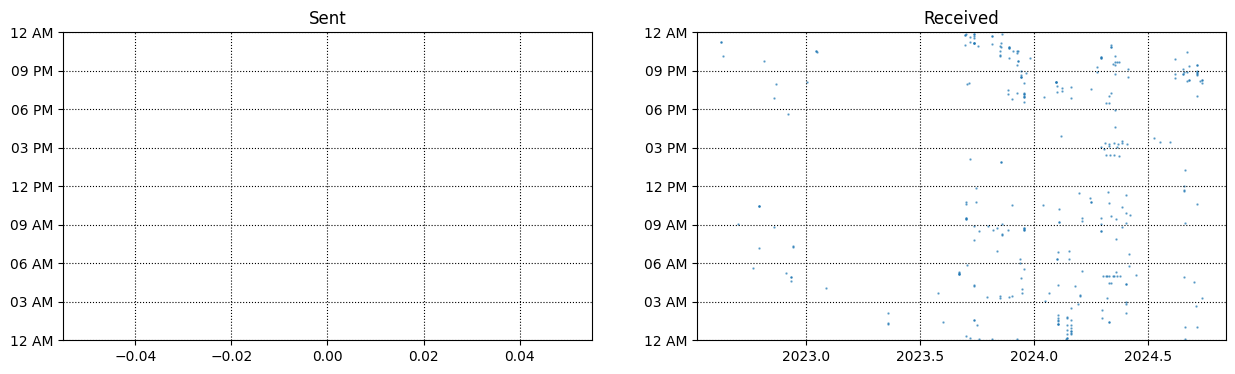

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

plot_todo_vs_year(sent, ax[0], title='Sent')
plot_todo_vs_year(received, ax[1], title='Received')

In [46]:
def plot_number_perday_per_year(df, ax, label=None, dt=0.3, **plot_kwargs):
    year = df[df['year'].notna()]['year'].values
    T = year.max() - year.min()
    bins = int(T / dt)
    weights = 1 / (np.ones_like(year) * dt * 365.25)
    ax.hist(year, bins=bins, weights=weights, label=label, **plot_kwargs);
    ax.grid(ls=':', color='k')

In [52]:
from scipy import ndimage

def plot_number_perdhour_per_year(df, ax, label=None, dt=1, smooth=False,
                      weight_fun=None, **plot_kwargs):

    tod = df[df['timeofday'].notna()]['timeofday'].values
    year = df[df['year'].notna()]['year'].values
    Ty = year.max() - year.min()
    T = tod.max() - tod.min()
    bins = int(T / dt)
    if weight_fun is None:
        weights = 1 / (np.ones_like(tod) * Ty * 365.25 / dt)
    else:
        weights = weight_fun(df)
    if smooth:
        hst, xedges = np.histogram(tod, bins=bins, weights=weights);
        x = np.delete(xedges, -1) + 0.5*(xedges[1] - xedges[0])
        hst = ndimage.gaussian_filter(hst, sigma=0.75)
        f = interp1d(x, hst, kind='cubic')
        x = np.linspace(x.min(), x.max(), 10000)
        hst = f(x)
        ax.plot(x, hst, label=label, **plot_kwargs)
    else:
        ax.hist(tod, bins=bins, weights=weights, label=label, **plot_kwargs);


    ax.grid(ls=':', color='k')
    orientation = plot_kwargs.get('orientation')
    if orientation is None or orientation == 'vertical':
        ax.set_xlim(0, 24)
        ax.xaxis.set_major_locator(MaxNLocator(8))
        ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_xticks()]);
    elif orientation == 'horizontal':
        ax.set_ylim(0, 24)
        ax.yaxis.set_major_locator(MaxNLocator(8))
        ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")
                            for ts in ax.get_yticks()]);



In [48]:
class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)
    plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
    self.ax2.set_xlabel('Average emails per hour')
    plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
    self.ax3.set_ylabel('Average emails per day')

<ipython-input-43-725e438063d6>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p") for ts in ax.get_yticks()]);
<ipython-input-54-91e0f3e80821>:40: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


DataFrame is empty, skipping plot.


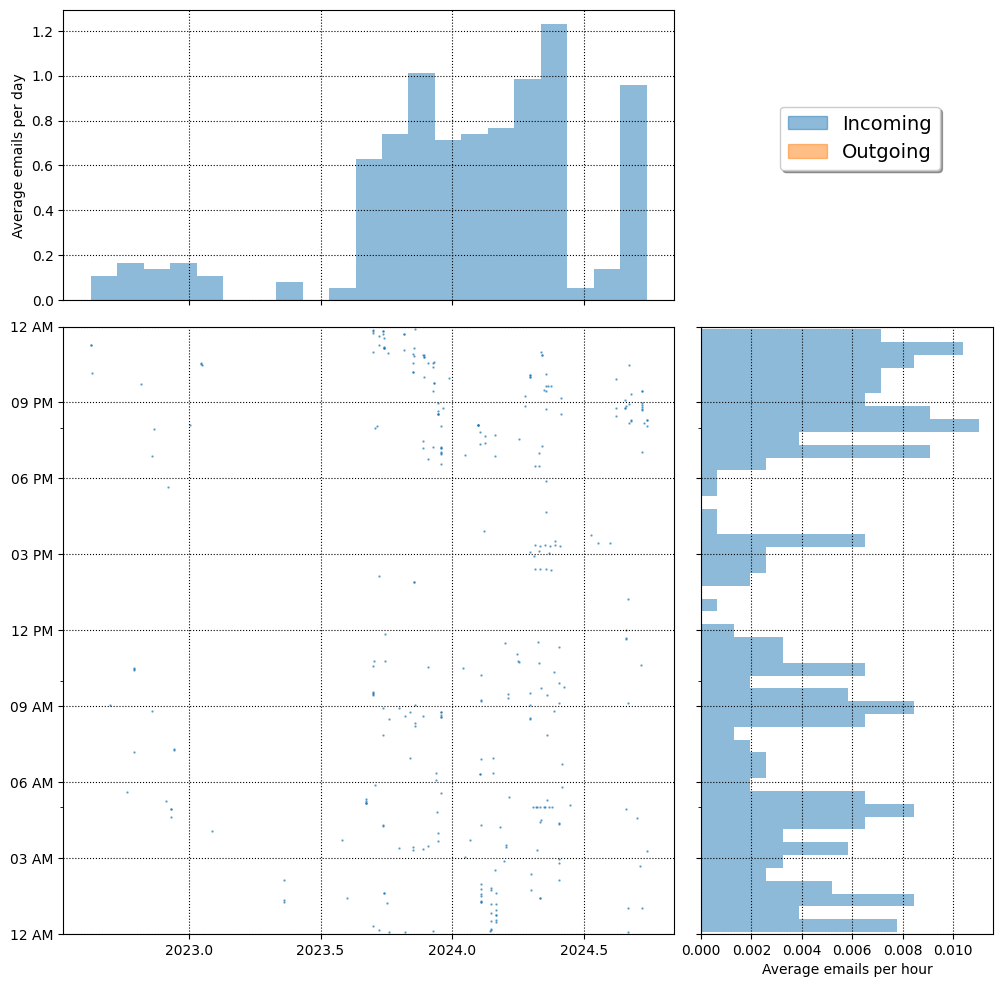

In [55]:
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage
from scipy.interpolate import interp1d
from matplotlib.ticker import MaxNLocator
import datetime


class TriplePlot:
  def __init__(self):
    gs = gridspec.GridSpec(6, 6)
    self.ax1 = plt.subplot(gs[2:6, :4])
    self.ax2 = plt.subplot(gs[2:6, 4:6], sharey=self.ax1)
    plt.setp(self.ax2.get_yticklabels(), visible=False);
    self.ax3 = plt.subplot(gs[:2, :4])
    plt.setp(self.ax3.get_xticklabels(), visible=False);

  def plot(self, df, color='darkblue', alpha=0.8, markersize=0.5, yr_bin=0.1, hr_bin=0.5):
    # Check if df is empty
    if df.empty:
      print("DataFrame is empty, skipping plot.")
      return

    plot_todo_vs_year(df, self.ax1, color=color, s=markersize)

    # Check if year column has any non-NaN values
    if df['year'].notna().any():
      plot_number_perdhour_per_year(df, self.ax2, dt=hr_bin, color=color, alpha=alpha, orientation='horizontal')
      self.ax2.set_xlabel('Average emails per hour')
    else:
      print("No valid year data, skipping plot_number_perdhour_per_year.")

    # Check if timeofday column has any non-NaN values
    if df['timeofday'].notna().any():
      plot_number_perday_per_year(df, self.ax3, dt=yr_bin, color=color, alpha=alpha)
      self.ax3.set_ylabel('Average emails per day')
    else:
      print("No valid timeofday data, skipping plot_number_perday_per_year.")

plt.figure(figsize=(12,12));
tpl = TriplePlot()

tpl.plot(received, color='C0', alpha=0.5)
tpl.plot(sent, color='C1', alpha=0.5)
p1 = mpatches.Patch(color='C0', label='Incoming', alpha=0.5)
p2 = mpatches.Patch(color='C1', label='Outgoing', alpha=0.5)
plt.legend(handles=[p1, p2], bbox_to_anchor=[1.45, 0.7], fontsize=14, shadow=True);

<Axes: xlabel='dayofweek'>

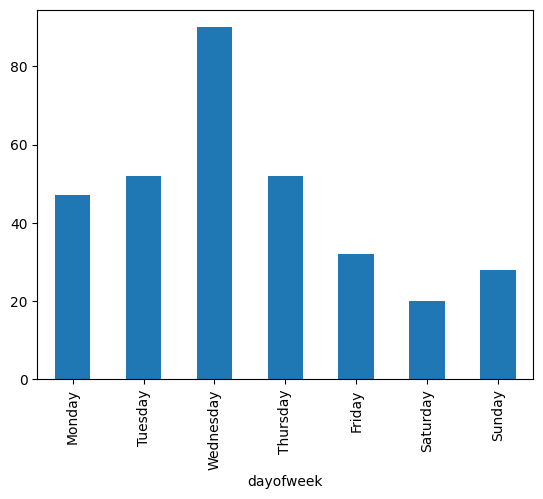

In [56]:
counts = dfs.dayofweek.value_counts(sort=False)
counts.plot(kind='bar')

In [57]:
addrs = received['from'].value_counts()

addrs[0:4]

,count
from,
nicole.deluna@students.isatu.edu.ph,100
team@datacamp.com,47
no-reply@accounts.google.com,36
noreply@github.com,25


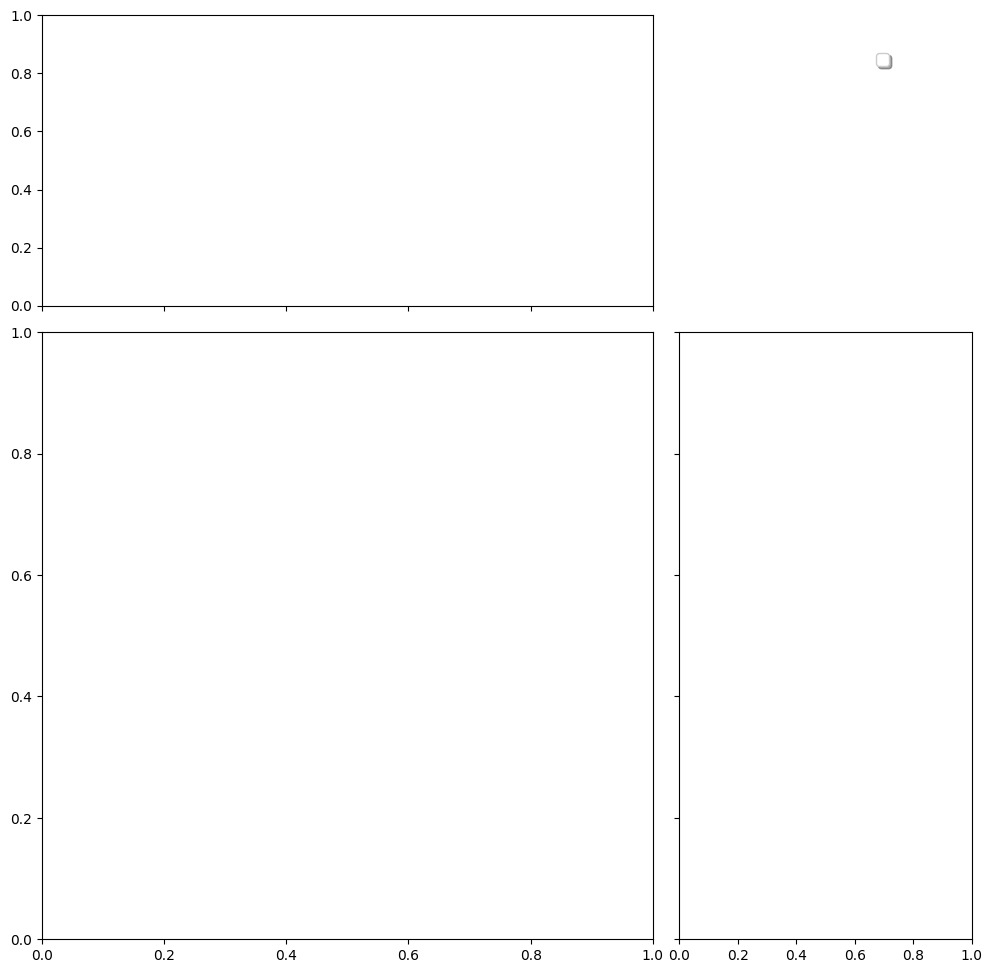

In [74]:
plt.figure(figsize=(12,12));

tpl = TriplePlot()

labels = []
colors = ['C{}'.format(ii) for ii in range(9)]
idx = np.array([1,2,3,7])
for ct, addr in enumerate(addrs.index[idx]):
    # Check if the 'date' column exists in the filtered DataFrame before plotting
    if 'date' in dfs[dfs['from'] == addr].columns:
        tpl.plot(dfs[dfs['from'] == addr], color=colors[ct], alpha=0.3, yr_bin=0.5, markersize=1.0)
        labels.append(mpatches.Patch(color=colors[ct], label=addrs[0:4], alpha=0.5))
plt.legend(handles=labels, bbox_to_anchor=[1.4, 0.9], fontsize=12, shadow=True);

<ipython-input-62-c5abe68ebf9d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sdw = sent.groupby('dayofweek').size() / len(sent)
<ipython-input-62-c5abe68ebf9d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rdw = received.groupby('dayofweek').size() / len(received)


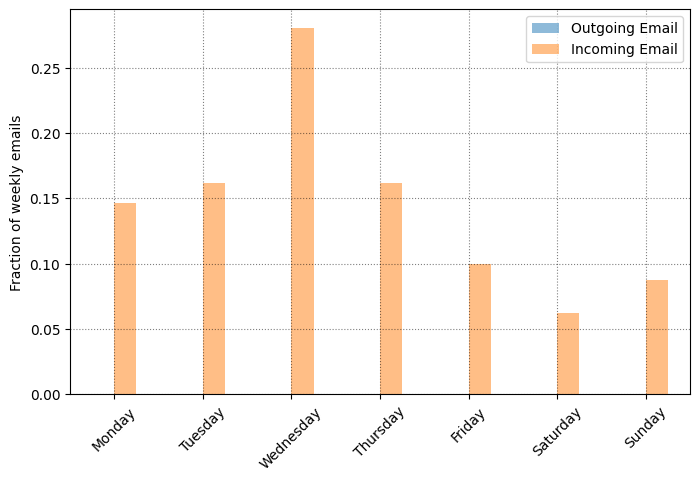

In [62]:
sdw = sent.groupby('dayofweek').size() / len(sent)
rdw = received.groupby('dayofweek').size() / len(received)

df_tmp = pd.DataFrame(data={'Outgoing Email': sdw, 'Incoming Email':rdw})
df_tmp.plot(kind='bar', rot=45, figsize=(8,5), alpha=0.5)
plt.xlabel('');
plt.ylabel('Fraction of weekly emails');
plt.grid(ls=':', color='k', alpha=0.5)

<ipython-input-54-91e0f3e80821>:35: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([datetime.datetime.strptime(str(int(np.mod(ts, 24))), "%H").strftime("%I %p")


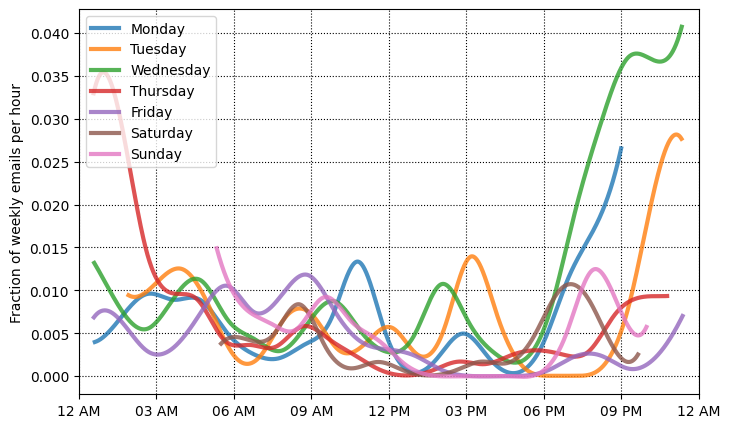

In [63]:
import scipy.ndimage
from scipy.interpolate import interp1d

plt.figure(figsize=(8,5))
ax = plt.subplot(111)
for ct, dow in enumerate(dfs.dayofweek.cat.categories):
    df_r = received[received['dayofweek']==dow]
    weights = np.ones(len(df_r)) / len(received)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_r, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=3, label=dow, weight_fun=wfun)

    df_s = sent[sent['dayofweek']==dow]
    weights = np.ones(len(df_s)) / len(sent)
    wfun = lambda x: weights
    plot_number_perdhour_per_year(df_s, ax, dt=1, smooth=True, color=f'C{ct}',
                      alpha=0.8, lw=2, label=dow, ls='--', weight_fun=wfun)
ax.set_ylabel('Fraction of weekly emails per hour')
plt.legend(loc='upper left')


In [66]:
from wordcloud import WordCloud

df_no_arxiv = dfs[dfs['from'] != 'no-reply@arXiv.org']
text = ' '.join(map(str, received['subject'].values))

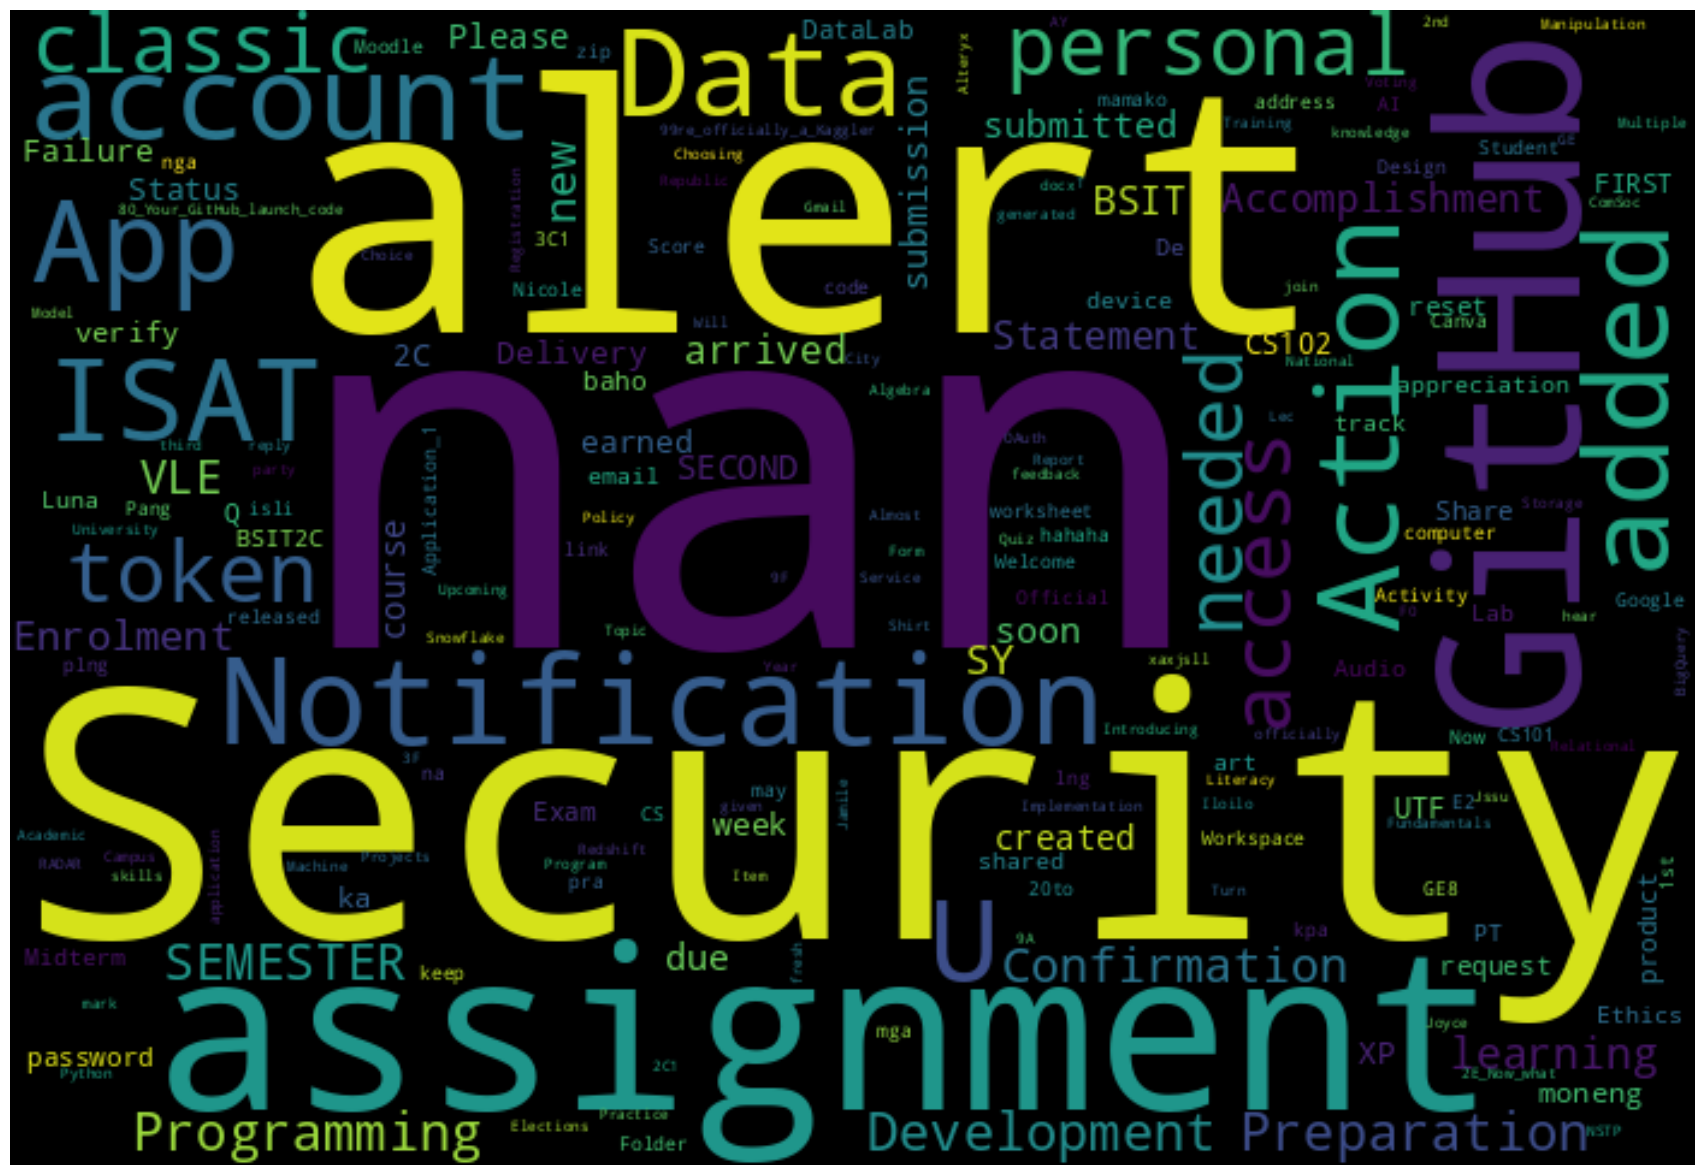

In [67]:
stopwords = ['Re', 'Fwd', '3A_']
wrd = WordCloud(width=700, height=480, margin=0, collocations=False)
for sw in stopwords:
    wrd.stopwords.add(sw)
wordcloud = wrd.generate(text)

plt.figure(figsize=(25,15))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)